In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def creatDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet ,labels

In [3]:
myData , labels = creatDataSet()
myData , labels

([[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']],
 ['no surfacing', 'flippers'])

In [4]:
def calcShannoEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel  = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * np.log2(prob)
    return shannonEnt

In [5]:
calcShannoEnt(myData)

0.9709505944546686

In [6]:
myData[0][-1] = 'mybe'
calcShannoEnt(myData)

1.3709505944546687

In [7]:
def splitDataSet(dataSet,axis,value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [9]:
splitDataSet(myData,0,1)

[[1, 'mybe'], [1, 'yes'], [0, 'no']]

In [114]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) -1
    baseEntropy = calcShannoEnt(dataSet)
    bestInforGain = 0.0
    bestFeature = -1
    newEntropy = 0.0
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        for value in uniqueVals :
            subDataSet = splitDataSet(dataSet , i ,value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannoEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInforGain):
            bestInforGain = infoGain
            bestFeature = i
    return bestFeature

In [115]:
chooseBestFeatureToSplit(myData)

0

In [164]:
def majoritycnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] +=1
    sortedClassCount = sorted(classCount.items() , key=lambda x : x[1] , reverse=True)
    return sortedClassCount[0][0]

In [165]:
def creatTree(dataSet ,labels):
    classList  = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del (labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals  = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = creatTree(
                            splitDataSet(dataSet,bestFeat,value),
                                subLabels)
    return myTree


In [166]:
myData  , labels = creatDataSet()
myTree = creatTree(myData,labels)

In [167]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [168]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )


In [169]:
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

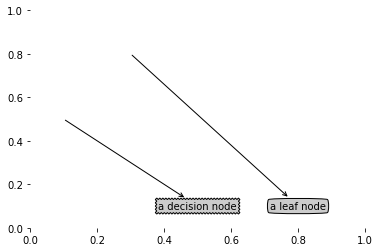

In [170]:
createPlot()

In [171]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

In [172]:
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth =  1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth :
            maxDepth = thisDepth
    return maxDepth

In [173]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [174]:
a = retrieveTree(0)
a

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [175]:
getNumLeafs(myTree)

3

In [176]:
def plotMidText(cntrPt,parenPt,txtString):
    xMid = (parenPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parenPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)

In [177]:
def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [178]:
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

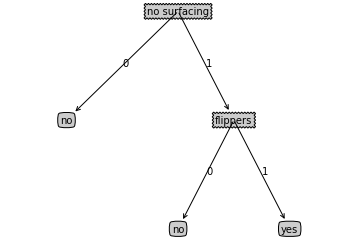

In [179]:
myTree = retrieveTree(0)
createPlot(myTree)

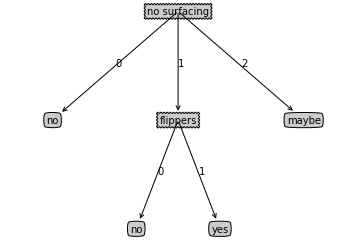

In [180]:
myTree['no surfacing'][2] = 'maybe'
createPlot(myTree)

In [181]:
def classify(inputTree , featLabels,testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key],
                                     featLabels,
                                     testVec)
            else :
                classLabel = secondDict[key]
    return classLabel

In [182]:
myData , labels = creatDataSet()
myData , labels 

([[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']],
 ['no surfacing', 'flippers'])

In [183]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [184]:
classify(myTree,labels,[1,1])

'yes'

In [185]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst  in fr.readlines()]
lensesLabels = ['age','prescript','astigmatic','tearRate']
lensesTree  = creatTree(lenses , lensesLabels)
lensesTree

{'age': {'pre': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': 'no lenses'}},
    'myope': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}},
  'presbyopic': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': 'no lenses'}},
    'myope': {'astigmatic': {'no': 'no lenses',
      'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}},
  'young': {'tearRate': {'hard': 'hard',
    'no lenses': 'no lenses',
    'soft': 'soft'}}}}

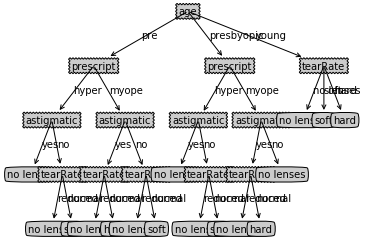

In [186]:
createPlot(lensesTree)